In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.shape

(768, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data['Glucose'] = data['Glucose'].replace(0,np.NaN)

In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     5
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
data['BloodPressure'] = data['BloodPressure'].replace(0,np.NaN)

In [12]:
data[['SkinThickness','Insulin','BMI']] = data[['SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [13]:
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Handling NaN values

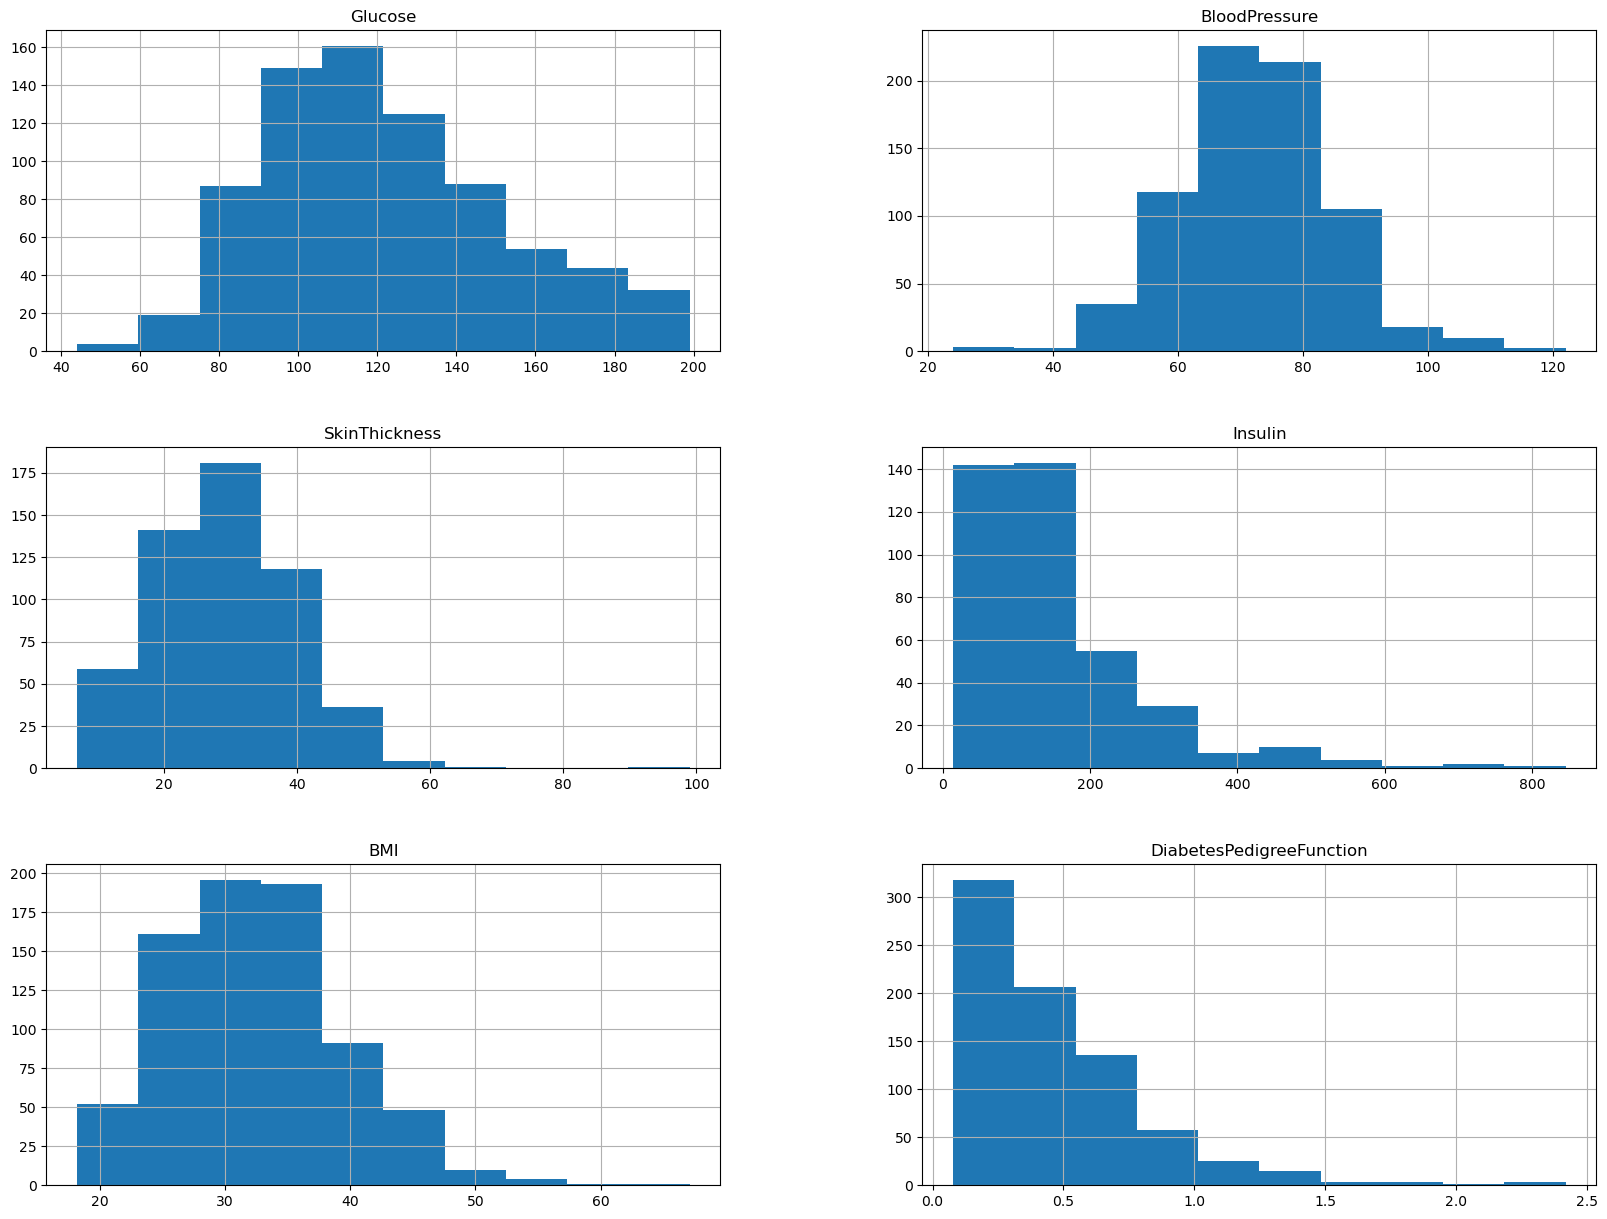

In [15]:
fraqgraph = data.select_dtypes(include=['float'])
fraqgraph.hist(figsize=(20, 15))
plt.show()

In [16]:
data['Glucose'] = data['Glucose'].fillna(data['Glucose'].mean())

In [17]:
data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].mean())

In [18]:
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].median())

In [19]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())

In [20]:
data['BMI'] = data['BMI'].fillna(data['BMI'].median())

In [21]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [24]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.710121,70.935397,27.726000,127.792000,30.885600,0.429734,31.190000
1,4.865672,142.165573,75.147324,31.686567,164.701493,35.383582,0.550500,37.067164


In [25]:
# separating the data and labels
X = data.drop(columns = 'Outcome', axis=1)
Y = data['Outcome']

# Data Standardization

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [28]:
scaler.fit(X)

StandardScaler()

In [29]:
standardized_data = scaler.transform(X)

In [30]:
pd.DataFrame(standardized_data).describe()

,0,1,2,3,4,5,6,7
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-3.561966e-16,6.915764e-16,-1.526557e-16,1.503427e-17,2.613650e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.554131e+00,-4.004245e+00,-2.516429e+00,-1.467353e+00,-2.074783e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.212214e-01,-6.953060e-01,-4.675972e-01,-2.220849e-01,-7.212087e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.540881e-01,-1.675912e-02,-1.230129e-02,-1.815412e-01,-2.258989e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.103090e-01,6.282695e-01,3.291706e-01,-1.554775e-01,6.032562e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.541850e+00,4.102655e+00,7.955377e+00,8.170442e+00,5.042397e+00,5.883565e+00,4.063716e+00


In [31]:
X = standardized_data
Y = data['Outcome']

# Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# Training the Model

# LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()
logModel.fit(X_train, Y_train)
y_pred = logModel.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score

In [36]:
print('Accuracy is : ', accuracy_score(Y_test, y_pred))
print('precision_score is : ', precision_score(Y_test, y_pred))
print('recall_score is : ', recall_score(Y_test, y_pred))
print('f1_score is : ', f1_score(Y_test, y_pred))
print('Accuracy is : ', accuracy_score(Y_test, y_pred))

Accuracy is :  0.7402597402597403
precision_score is :  0.6842105263157895
recall_score is :  0.48148148148148145
f1_score is :  0.5652173913043478
Accuracy is :  0.7402597402597403


In [37]:
confusion_matrix(Y_test, y_pred)

array([[88, 12],
       [28, 26]])

# KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
acc_values = []
neighbors = np.arange(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski')
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    acc_values.append(acc)

In [40]:
acc_values

[0.6818181818181818,
 0.7012987012987013,
 0.6948051948051948,
 0.6883116883116883,
 0.7077922077922078,
 0.7207792207792207,
 0.7207792207792207,
 0.7142857142857143,
 0.7207792207792207,
 0.7077922077922078,
 0.7207792207792207,
 0.7207792207792207]

Text(0, 0.5, 'accuracy')

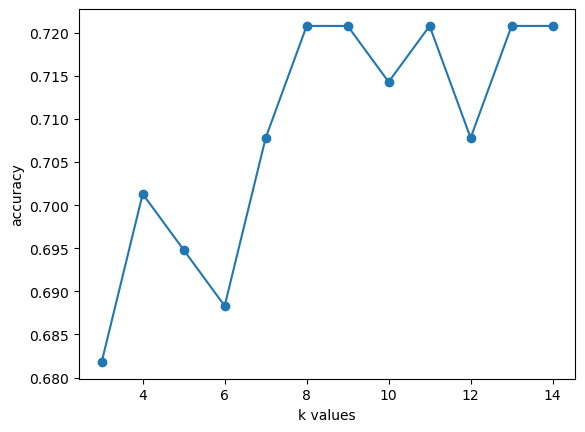

In [41]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k values')
plt.ylabel('accuracy')

In [42]:
classifier = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski')
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

In [43]:
print('Accuracy is : ', accuracy_score(Y_test, y_pred))
print('precision_score is : ', precision_score(Y_test, y_pred))
print('recall_score is : ', recall_score(Y_test, y_pred))
print('f1_score is : ', f1_score(Y_test, y_pred))
print('Accuracy is : ', accuracy_score(Y_test, y_pred))

Accuracy is :  0.7207792207792207
precision_score is :  0.6571428571428571
recall_score is :  0.42592592592592593
f1_score is :  0.5168539325842697
Accuracy is :  0.7207792207792207


In [44]:
confusion_matrix(Y_test, y_pred)

array([[88, 12],
       [31, 23]])

# SVM

In [45]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')

In [46]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [47]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [48]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7801302931596091


In [49]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [50]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7662337662337663


# Polynomial SVM

In [51]:
classifier = svm.SVC(kernel='poly', degree = 3)

In [52]:
classifier.fit(X_train, Y_train)
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.7866449511400652
Accuracy score of the test data :  0.7077922077922078


# Radial SVM

In [53]:
classifier = svm.SVC(kernel='rbf')

In [54]:
classifier.fit(X_train, Y_train)
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.8273615635179153
Accuracy score of the test data :  0.7532467532467533
